#  Data Science Blog Post - Goodreads

##### Dataset https://github.com/zygmuntz/goodbooks-10k

In [34]:
import pandas as pd

# import data
r = pd.read_csv('ratings.csv')
t = pd.read_csv('tags.csv')
bt = pd.read_csv('book_tags.csv')
tr = pd.read_csv( 'to_read.csv' )

In [35]:
books_data = pd.read_csv( 'books.csv' )
books_data.head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [36]:
#remove unwanted cols from books_data
books_data.dtypes
books_data = books_data.drop(["best_book_id", "work_id", "isbn", "isbn13", "work_ratings_count", "work_text_reviews_count", "image_url", "small_image_url", "language_code"], axis=1)
books_data.head()

,book_id,goodreads_book_id,books_count,authors,original_publication_year,original_title,title,average_rating,ratings_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5
0,1,2767052,272,Suzanne Collins,2008.0,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",4.34,4780653,66715,127936,560092,1481305,2706317
1,2,3,491,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,Harry Potter and the Sorcerer's Stone (Harry P...,4.44,4602479,75504,101676,455024,1156318,3011543
2,3,41865,226,Stephenie Meyer,2005.0,Twilight,"Twilight (Twilight, #1)",3.57,3866839,456191,436802,793319,875073,1355439
3,4,2657,487,Harper Lee,1960.0,To Kill a Mockingbird,To Kill a Mockingbird,4.25,3198671,60427,117415,446835,1001952,1714267
4,5,4671,1356,F. Scott Fitzgerald,1925.0,The Great Gatsby,The Great Gatsby,3.89,2683664,86236,197621,606158,936012,947718


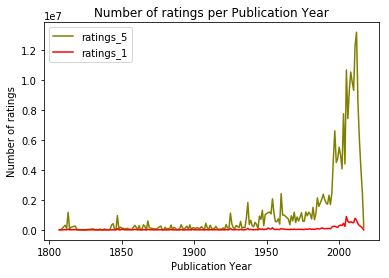

In [37]:
'''

Q1: Are classic books better than modren ones?
we can answer this qustion by studing the gap between the number of users rating a book 5 stars 
and the number of users rating a book 1 star.


'''


import matplotlib.pyplot as plt

#remove negative values
books_data = books_data[books_data['original_publication_year'] >= 1800]
books_data["original_publication_year"].describe()


listoftopbbooks = books_data.groupby(['original_publication_year','ratings_5']).size().reset_index().groupby('original_publication_year').sum().reset_index()
listoftopbbooks.head()

listofavragebooks = books_data.groupby(['original_publication_year','ratings_3']).size().reset_index().groupby('original_publication_year').sum().reset_index()
listofavragebooks.head()

listoflowbooks = books_data.groupby(['original_publication_year','ratings_1']).size().reset_index().groupby('original_publication_year').sum().reset_index()
listoflowbooks.head()

listoflowbooks2 = books_data.groupby(['original_publication_year','ratings_2']).size().reset_index().groupby('original_publication_year').sum().reset_index()
listoflowbooks2.head()

plt.plot( 'original_publication_year', 'ratings_5', data=listoftopbbooks, marker='', color='olive')
plt.plot( 'original_publication_year', 'ratings_1', data=listoflowbooks, marker='', color='red')
plt.xlabel('Publication Year');
plt.ylabel('Number of ratings');
plt.title('Number of ratings per Publication Year');
plt.legend();





# ax2 = plt.gca()



# plt.show()


In [38]:
'''


Q2: What is the best book genre according to goodreads users?

By studying the number of books that were rated 5 stars accross diffrent genres
 

'''


# Explor books tags + Merge
data = pd.merge(t, bt, on='tag_id', how='outer', indicator=True)
# null vals = 0 
data.isnull().sum()
# Merge books details data with tags
data = data.merge( books_data[[ 'goodreads_book_id', 'title', 'original_publication_year', 'average_rating', 'ratings_count', 'ratings_5', 'authors' ]], on = 'goodreads_book_id' )
data.head()

,tag_id,tag_name,goodreads_book_id,count,_merge,title,original_publication_year,average_rating,ratings_count,ratings_5,authors
0,0,-,665,3,both,The Virtue of Selfishness: A New Concept of Eg...,1961.0,3.47,10198,2974,"Ayn Rand, Nathaniel Branden"
1,41,-post,665,11,both,The Virtue of Selfishness: A New Concept of Eg...,1961.0,3.47,10198,2974,"Ayn Rand, Nathaniel Branden"
2,45,-specific,665,11,both,The Virtue of Selfishness: A New Concept of Eg...,1961.0,3.47,10198,2974,"Ayn Rand, Nathaniel Branden"
3,433,1945,665,7,both,The Virtue of Selfishness: A New Concept of Eg...,1961.0,3.47,10198,2974,"Ayn Rand, Nathaniel Branden"
4,434,1945-,665,10,both,The Virtue of Selfishness: A New Concept of Eg...,1961.0,3.47,10198,2974,"Ayn Rand, Nathaniel Branden"


In [39]:
topcatg = data.groupby('tag_name').ratings_5.count().sort_values( ascending = False ).reset_index()
topcatg.head()

,tag_name,ratings_5
0,to-read,9837
1,favorites,9743
2,owned,9721
3,books-i-own,9660
4,currently-reading,9639


In [40]:
# filter out unrelated tags
to_delete = ['favorites', 'owned', 'books-i-own', 'currently-reading', 'owned-books', 'to-buy', 'kindle', 'to-read'
            ,'library', 'default', 'ebook', 'my-books', 'audiobook', 'ebooks' , 'wish-list' , 'my-library', 'i-own', 'audio'
             , 'audiobooks' , 'favourites', 'own-it', 'read-in-2015' , 'e-book', 'read-in-2016', 'read-in-2014', 'books'
            , 'e-books', 'read-in-2013' , 'book-club', 'audible', 'audio-books', 'abandoned', 're-read', 'have'
             , 'audio-book', 'borrowed', 'read-in-2012', 'did-not-finish', 'maybe', 'shelfari-favorites',
             'favorite', 'general-fiction', 'read-2015' , 'ya' , 'all-time-favorites', 'adult', 'novels', 'novel', 'english'
            , 'read-2016' , 'read-2014', 'favorite-books', 'dnf', 'favorite-books',
             'finished', 'read-in-2011' , 'read-in-2017', '5-stars', 'paperback', 'american', 'reviewed', '4-stars'
             , 'unfinished', 'read-2013'
            ]

# keep only this
for col in to_delete:
    topcatg = topcatg[topcatg.tag_name != col]
    
# Select top 18 
toptag = topcatg.iloc[0:18,:] 
toptag



,tag_name,ratings_5
7,fiction,8973
24,contemporary,5282
26,series,5059
31,adult-fiction,4728
36,romance,4216
38,fantasy,4204
44,mystery,3678
47,adventure,3633
48,young-adult,3612
54,drama,2998


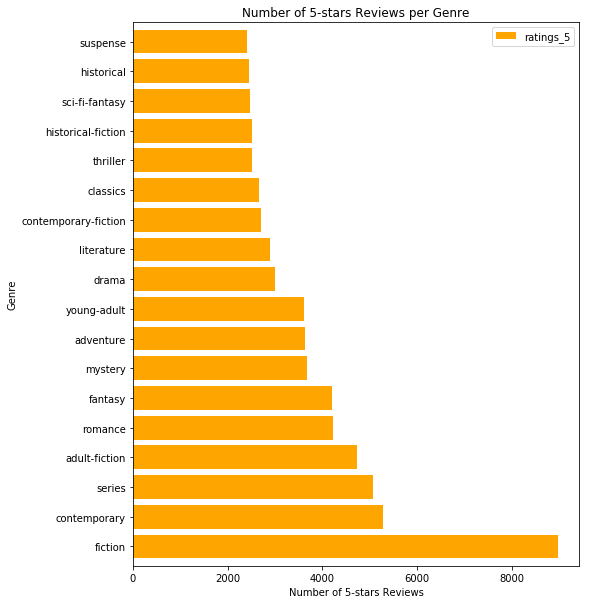

In [41]:
# Plot the data

ax2 = plt.gca()

toptag.plot(kind='barh',x='tag_name',y='ratings_5', color='orange',ax=ax2, figsize=(8, 10), zorder=2, width=0.80
)
plt.xlabel('Number of 5-stars Reviews');
plt.ylabel('Genre');
plt.title('Number of 5-stars Reviews per Genre');
plt.legend();
plt.show()

In [42]:
# get the top 20 highest rated books
highest_rated = books_data.sort_values(by=['average_rating'], ascending=False)
highest_rated = highest_rated.iloc[0:30,:]
highest_rated.head(15)

,book_id,goodreads_book_id,books_count,authors,original_publication_year,original_title,title,average_rating,ratings_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5
3627,3628,24812,14,Bill Watterson,2005.0,The Complete Calvin and Hobbes,The Complete Calvin and Hobbes,4.82,28900,120,154,693,3117,25884
861,862,17332218,34,Brandon Sanderson,2014.0,Words of Radiance,"Words of Radiance (The Stormlight Archive, #2)",4.77,73572,154,404,2653,18272,86693
3274,3275,8,11,"J.K. Rowling, Mary GrandPré",2003.0,NaN,"Harry Potter Boxed Set, Books 1-5 (Harry Potte...",4.77,33220,317,233,978,3686,28210
8853,8854,95602,6,Francine Rivers,1993.0,Mark of the Lion Trilogy,Mark of the Lion Trilogy,4.76,9081,27,61,323,1363,7773
7946,7947,5031805,96,"Anonymous, Lane T. Dennis, Wayne A. Grudem",2002.0,NaN,ESV Study Bible,4.76,8953,98,90,367,1152,9077
4482,4483,24814,21,Bill Watterson,1996.0,It's a Magical World: A Calvin and Hobbes Coll...,It's a Magical World: A Calvin and Hobbes Coll...,4.75,22351,36,57,850,3737,18749
6360,6361,70489,22,Bill Watterson,1996.0,There's Treasure Everywhere: A Calvin and Hobb...,There's Treasure Everywhere: A Calvin and Hobb...,4.74,16766,22,69,680,2822,13692
421,422,862041,76,J.K. Rowling,1998.0,Complete Harry Potter Boxed Set,"Harry Potter Boxset (Harry Potter, #1-7)",4.74,190050,1105,1285,7020,30666,164049
6919,6920,24815,19,Bill Watterson,1992.0,The Indispensable Calvin and Hobbes: A Calvin ...,The Indispensable Calvin and Hobbes,4.73,14597,19,62,666,2969,13195
6589,6590,59715,21,Bill Watterson,1990.0,The Authoritative Calvin and Hobbes,The Authoritative Calvin and Hobbes: A Calvin ...,4.73,16087,20,61,701,3295,14121


In [43]:
'''
Does the number of reviews per book and avrage raiting affects people choice of reading a book?

'''

# get the top 20 highest rated books
highest_rated = books_data.sort_values(by=['average_rating'], ascending=False)
highest_rated = highest_rated.iloc[0:30,:]



# get the most reviewd books
highest_reviews = r.groupby('book_id').user_id.count().sort_values( ascending = False ).reset_index()
highest_reviews = highest_reviews.rename(columns={"user_id": "number_of_reviews"
                                                 ,"book_id":"goodreads_book_id"})
highest_reviews = highest_reviews.merge( books_data[[ 'goodreads_book_id', 'title']], on = 'goodreads_book_id' )
highest_reviews = highest_reviews.iloc[0:30,:]


tr.head()
to_reads = tr.groupby('book_id').user_id.count().sort_values( ascending = False ).reset_index()
to_reads = to_reads.rename(columns={"user_id": "number_of_tread"
                                                 ,"book_id":"goodreads_book_id"})
to_reads = to_reads.merge( books_data[[ 'goodreads_book_id', 'title']], on = 'goodreads_book_id' )
to_reads = to_reads.iloc[0:30,:]

to_reads.head()

,goodreads_book_id,number_of_tread,title
0,13,1812,The Ultimate Hitchhiker's Guide to the Galaxy
1,11,1767,The Hitchhiker's Guide to the Galaxy (Hitchhik...
2,119,1499,The Lord of the Rings: The Art of The Fellowsh...
3,8,1498,"Harry Potter Boxed Set, Books 1-5 (Harry Potte..."
4,6,1484,Harry Potter and the Goblet of Fire (Harry Pot...


In [44]:
# get the top books marked as "to read"

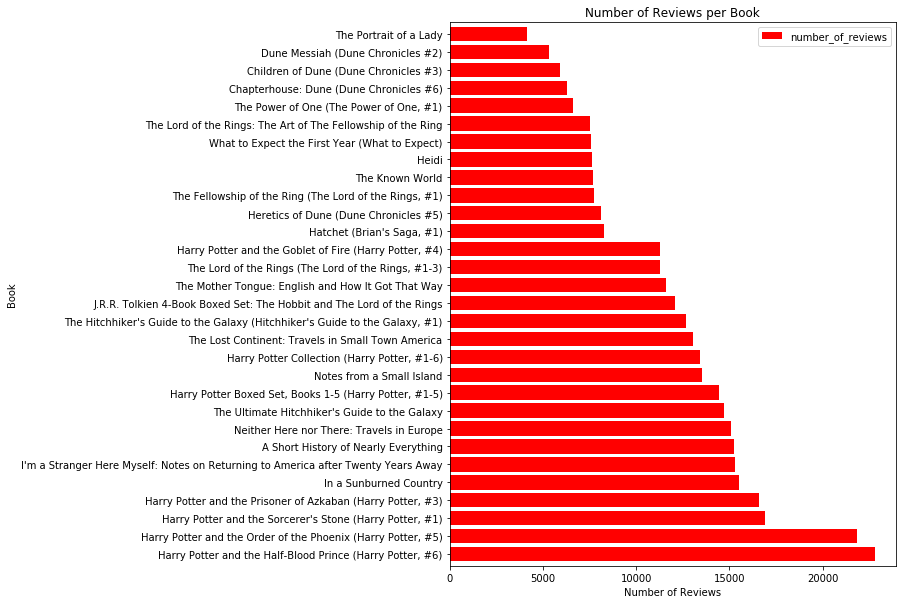

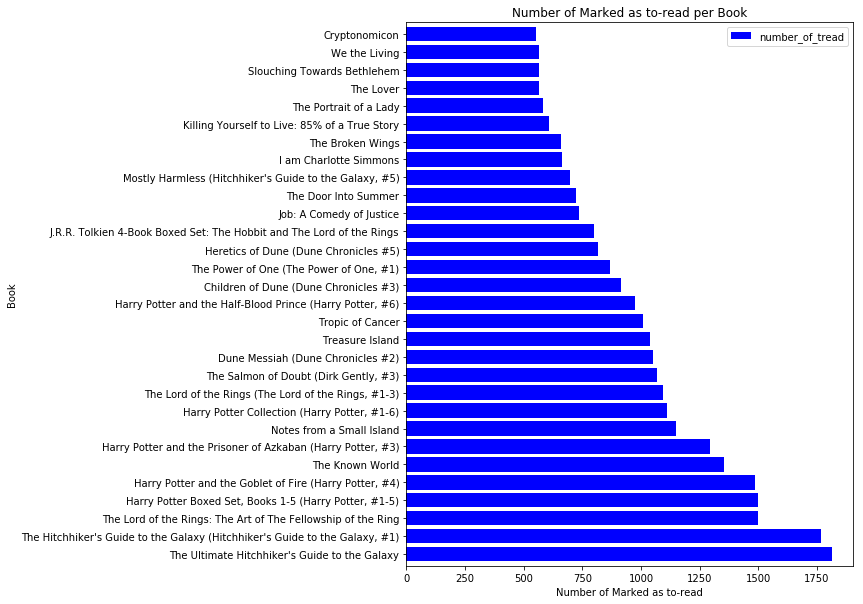

In [47]:
# plot highest rated books
# ax2 = plt.gca()
# binwidth = 0.02
# highest_rated.plot(kind='barh',x='title',y='average_rating', color='orange',ax=ax2,figsize=(8, 10), 
#                    zorder=2, width=0.80)
# plt.axis([ 0, 5,0,30])
# plt.show()



# plot highest reviewd books
ax2 = plt.gca()
binwidth = 0.02
highest_reviews.plot(kind='barh',x='title',y='number_of_reviews', color='red',ax=ax2,figsize=(8, 10), 
                   zorder=2, width=0.80)
#plt.axis([ 0, 5,0,30])
plt.xlabel('Number of Reviews');
plt.ylabel('Book');
plt.title('Number of Reviews per Book');
plt.show()


# plot highest marked as to-read books
ax2 = plt.gca()
binwidth = 0.02
to_reads.plot(kind='barh',x='title',y='number_of_tread', color='blue',ax=ax2,figsize=(8, 10), 
                   zorder=2, width=0.80)
plt.xlabel('Number of Marked as to-read');
plt.ylabel('Book');
plt.title('Number of Marked as to-read per Book');
#plt.axis([ 0, 5,0,30])
plt.show()